<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Nov4/Regresionlogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [160]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline


In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/UGTO/DCI-data/CATS_DOGS/*')

In [163]:
len(files)

1787

# Conjunto de datos de prueba

In [164]:
#numero de pixeles para nuestras imágenes.
num_px=64

In [165]:
train_x=[]
train_y=[]
i,j=0,0
for file in files[:]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    if 'dog' in file and i<50:
        train_y.append(1)
        i +=1
        train_x.append(data)
        img.close()
    if 'cat' in file and j<50:
        train_y.append(0)
        j +=1
        train_x.append(data)
        img.close()
    if i==50 and j==50:
        print(f'50/50:{i}/{j}')
        break
        img.close()
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

50/50:50/50


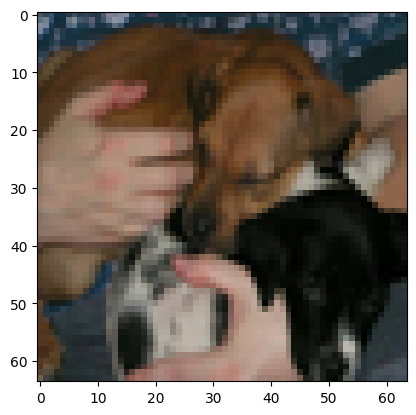

In [166]:
plt.imshow(train_x[50])

In [167]:
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [168]:
len(train_y)

100

#Preparamos la base

In [169]:
test_x=[]
test_y=[]
i,j=0,0
for file in files[:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    if 'dog' in file and i<99:
        i += 1
        if i>49:
          test_y.append(1)
          test_x.append(data)
          #print(i)
        img.close()
    if 'cat' in file and j<99:
        j += 1
        if j>49:
          test_y.append(0)
          test_x.append(data)
        img.close()
    if i==100 and j==100:
        print(f'50/50:{i}/{j}')
        break
        img.close
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

In [170]:
len(test_x)

100

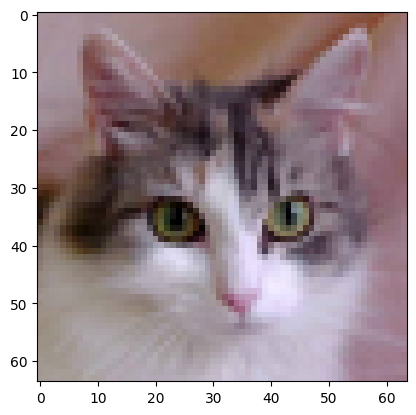

In [171]:
plt.imshow(test_x[0])

In [172]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [173]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [174]:
train_x_flatten.shape

(12288, 100)

# Funciones

$$z= \omega^T x+b$$

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

In [365]:
#funcion Z
def z(x,w,b):
  return w.T @ x + b
#funcion sigma
def sigma(x,w,b,z):
  return (1/(1+np.exp(-z(x,w,b))))
#funcion costo
def J(x,y,w,b,z,sigma):
  y_=sigma(x,w,b,z)
  m=y.shape[1]
  j=np.sum(y*np.log(y_)+(1-y)*np.log(1-y_))
  return -j/m


##Derivadas
$\omega = \omega -\alpha\frac{dJ}{d\omega}=\omega -\alpha d\omega$

$b = b -\alpha\frac{dJ}{db}=b -\alpha db$

  * $d\omega=\frac{1}{m} x dz$
  * $db=\frac{1}{m}dz$
  * $dz= a-y$

In [379]:
#derivada
def dw(x,y,w,b,z,sigma):
  y_=sigma(x,w,b,z)
  m=y.shape[1]
  return (1/m)*x@(y_-y)

def db(x,y,w,b,z,sigma):
  y_=sigma(x,w,b,z)
  m=y.shape[1]
  return (1/m)*(y_-y)

def Grad_desc(x,y,w,b,z,sigma,iter=1000,alpha=0.001):
  costs=[]
  for i in range(iter):
    # Registro de costo
    j=J(x,y,w,b,z,sigma)
    costs.append(j)
    # Actualizacion de pesos
    w=w-alpha*dw(x,y,w,b,z,sigma)
    b=b-alpha*db(x,y,w,b,z,sigma)
    if (i%10==0 ):
      print(f'Iteracion:{i},     costo:{j},    w:{np.sum(w)},   b:{np.sum(b)}')

  return costs,w,b

##Pruebas

In [380]:
#parametros iniciales
w=np.zeros(train_set_x.shape)
b=np.zeros(train_set_y.shape[1])
# Parametro de aprendizaje
alpha= 0.02
w.shape

(12288, 100)

In [378]:
b=b-alpha*db(train_set_x,train_set_y,w,b,z,sigma)
b

array([[-0.05018511, -0.05018511, -0.05018511, ...,  0.05018511,
         0.05018511,  0.05018511],
       [-0.05018511, -0.05018511, -0.05018511, ...,  0.05018511,
         0.05018511,  0.05018511],
       [-0.05018511, -0.05018511, -0.05018511, ...,  0.05018511,
         0.05018511,  0.05018511],
       ...,
       [-0.05018511, -0.05018511, -0.05018511, ...,  0.05018511,
         0.05018511,  0.05018511],
       [-0.05018511, -0.05018511, -0.05018511, ...,  0.05018511,
         0.05018511,  0.05018511],
       [-0.05018511, -0.05018511, -0.05018511, ...,  0.05018511,
         0.05018511,  0.05018511]])

In [372]:
costos ,w_ ,b_ =Grad_desc(train_set_x,train_set_y,w,b,z,sigma,iter=100,alpha=0.00001)

Iteracion:0,     costo:66.85595444657655,    w:2.962650198952421e-16,   b:-3.0252245153405966e-11
Iteracion:10,     costo:67.06306784379973,    w:-0.034621138091046465,   b:-1.7337382107740495e-07
Iteracion:20,     costo:67.68268953123008,    w:-0.1351395145152057,   b:-1.2144773444688894e-06
Iteracion:30,     costo:68.70934096833476,    w:-0.30531957421688566,   b:-3.904819120270631e-06
Iteracion:40,     costo:70.13405522596962,    w:-0.5481345170947439,   b:-8.97413310596562e-06
Iteracion:50,     costo:71.9447223888429,    w:-0.8655431059969109,   b:-1.705458079936939e-05
Iteracion:60,     costo:74.1265287394513,    w:-1.258329213029025,   b:-2.864340759334283e-05
Iteracion:70,     costo:76.66245441401756,    w:-1.7260216723622221,   b:-4.4077772656692105e-05
Iteracion:80,     costo:79.53379509498824,    w:-2.2669007773515744,   b:-6.352355091832074e-05
Iteracion:90,     costo:82.7206776529346,    w:-2.8780862089615904,   b:-8.697790333433986e-05


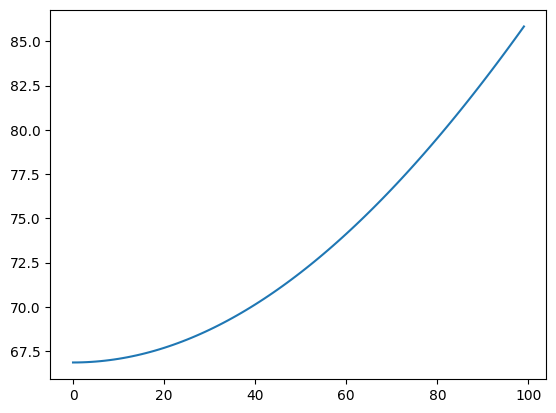

In [373]:
plt.plot(costos)

In [ ]:
def propagate()

In [224]:
np.log(0.5)

-0.6931471805599453

In [ ]:
1/(1+np.exp(-w.T @ train_x_flatten))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])